Equipe:
- Caroline Souza
- Danilo Bruno da Silva
- Eric Perin
- Kirk Sahdo
- Leonardo da Silva Martins
- Yara de Oliveira


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score

### Manipulando a base de dados


1. Abra a base de dados com o pandas

In [ ]:
data = 'Thyroid_Diff.csv'
df = pd.read_csv(data)
print(df.head())


   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

2. Imprima os 10 primeiros exemplos pertencentes à esta base

In [ ]:
print(df.head(10))

   Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
0   27      F      No         No              No                 Euthyroid   
1   34      F      No        Yes              No                 Euthyroid   
2   30      F      No         No              No                 Euthyroid   
3   62      F      No         No              No                 Euthyroid   
4   62      F      No         No              No                 Euthyroid   
5   52      M     Yes         No              No                 Euthyroid   
6   41      F      No        Yes              No  Clinical Hyperthyroidism   
7   46      F      No         No              No                 Euthyroid   
8   51      F      No         No              No                 Euthyroid   
9   40      F      No         No              No                 Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    U

3. Imprima os 10 últimos exemplos pertencentes à esta base

In [ ]:
print(df.tail(10))

     Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
373   31      M     Yes         No             Yes                 Euthyroid   
374   62      M     Yes         No              No                 Euthyroid   
375   59      F      No         No              No                 Euthyroid   
376   40      M     Yes         No              No                 Euthyroid   
377   46      M     Yes         No              No                 Euthyroid   
378   72      M     Yes        Yes             Yes                 Euthyroid   
379   81      M     Yes         No             Yes                 Euthyroid   
380   72      M     Yes        Yes              No                 Euthyroid   
381   61      M     Yes        Yes             Yes  Clinical Hyperthyroidism   
382   67      M     Yes         No              No                 Euthyroid   

            Physical Examination Adenopathy     Pathology     Focality  Risk  \
373   Single nodular goiter-left  Exten

In [ ]:
print(f"\nNúmero de exemplos na base de dados: {df.shape[0]}")


Número de exemplos na base de dados: 383


5. Quais são os atributos que a base de dados possui e quais seus tipos?

In [ ]:
atributos= df.dtypes
print(atributos)

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object


6. Há algum dado faltante na base?

In [ ]:
faltantes=df.isnull().sum()
print(faltantes)

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


### Visualizando a base de dados



1. Baseando-se nos fundamentos de visualização de dados abordados na disciplina, plote cada um dos atributos preditores de maneira a enfatizar a sua distribuição, tendência central e dispersão  



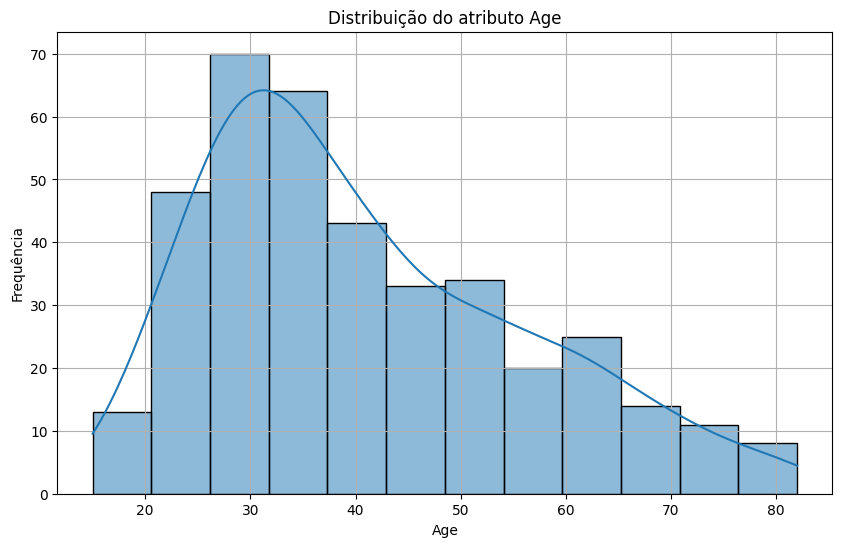

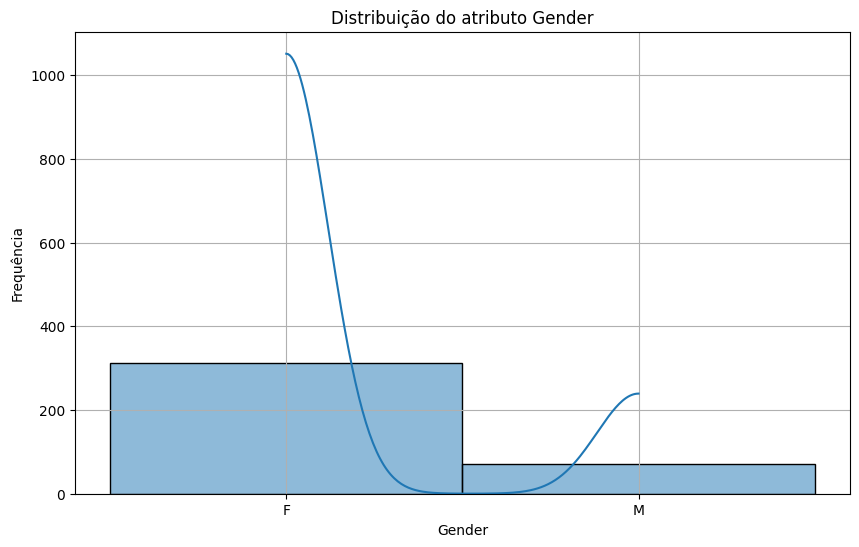

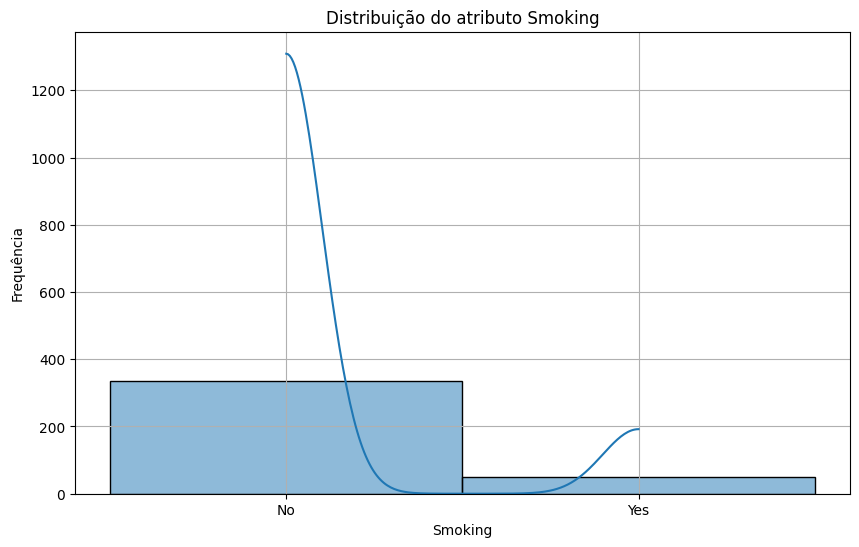

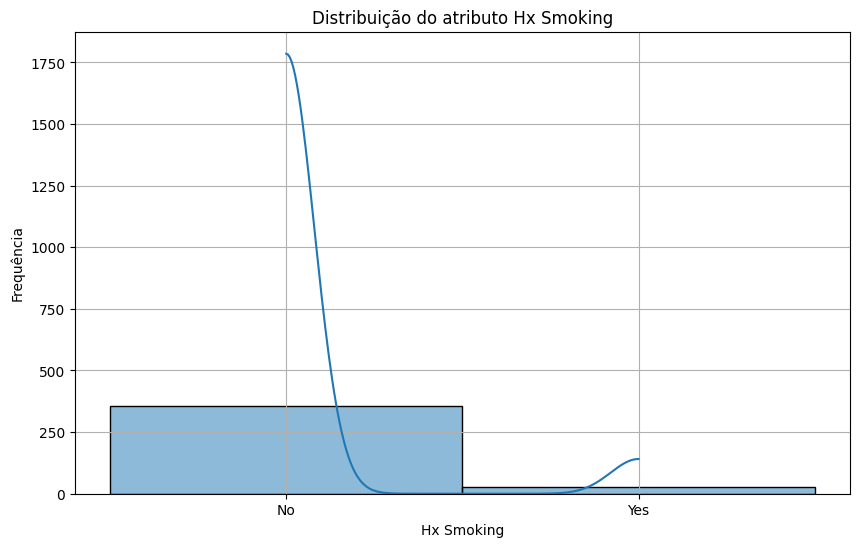

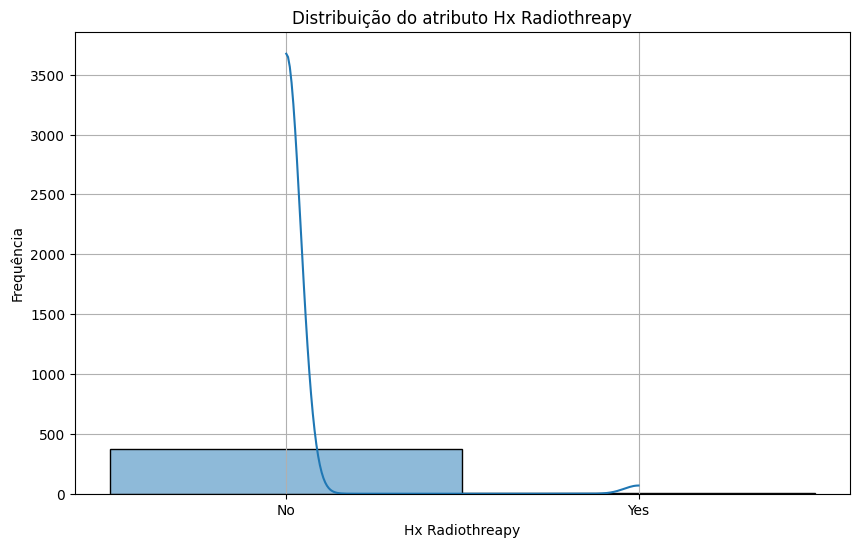

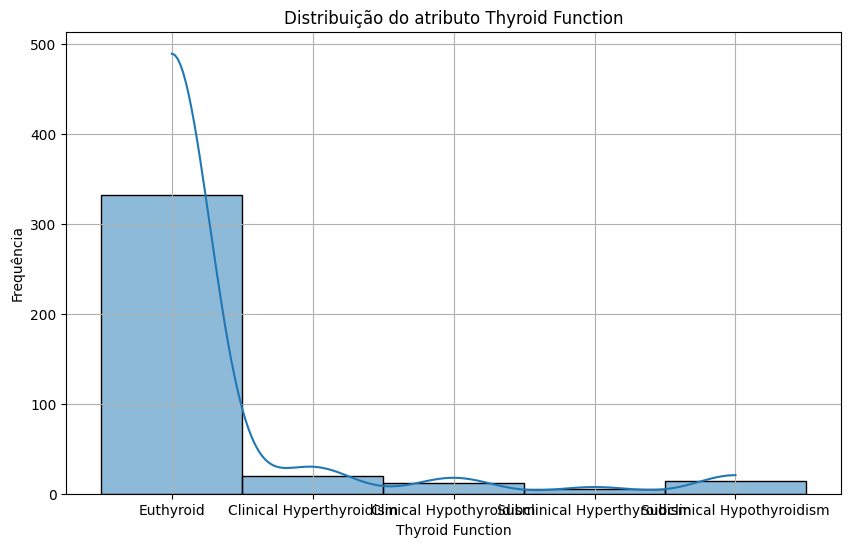

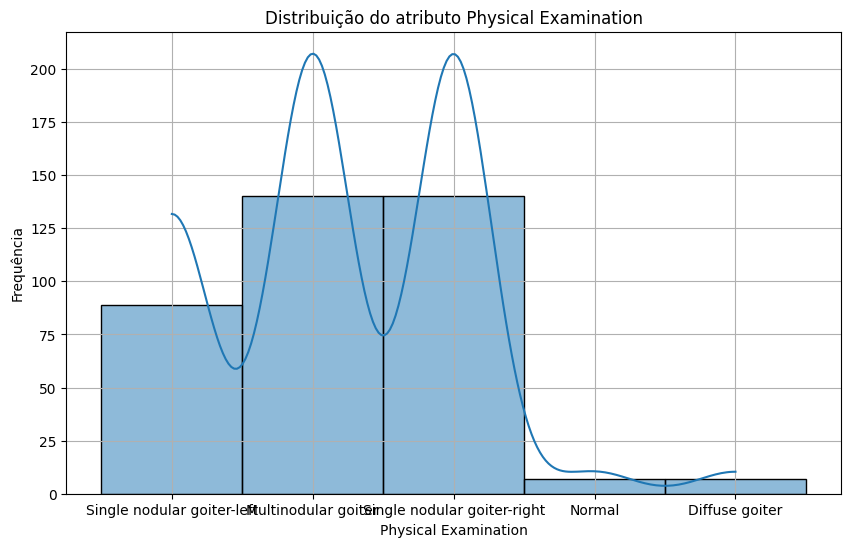

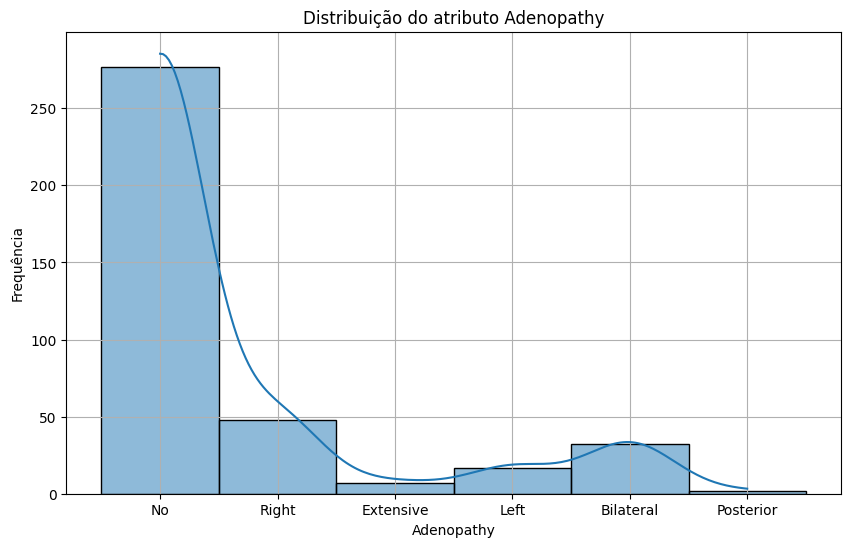

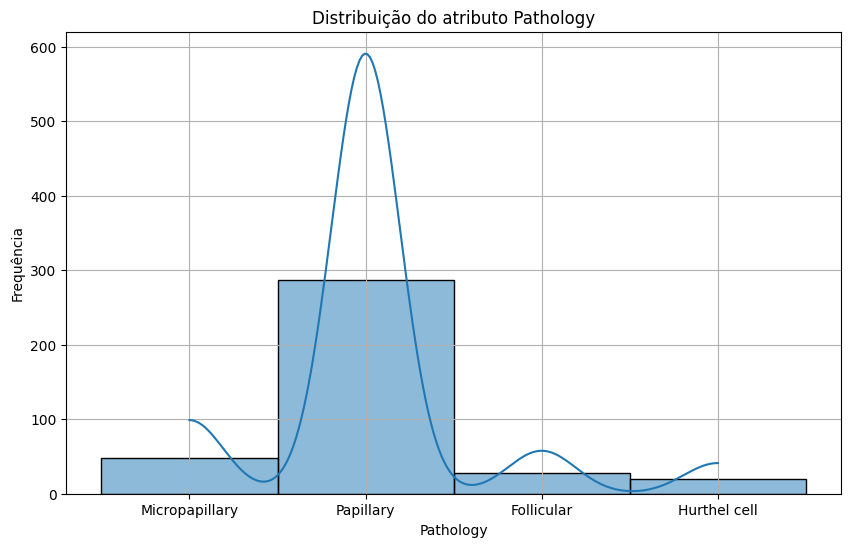

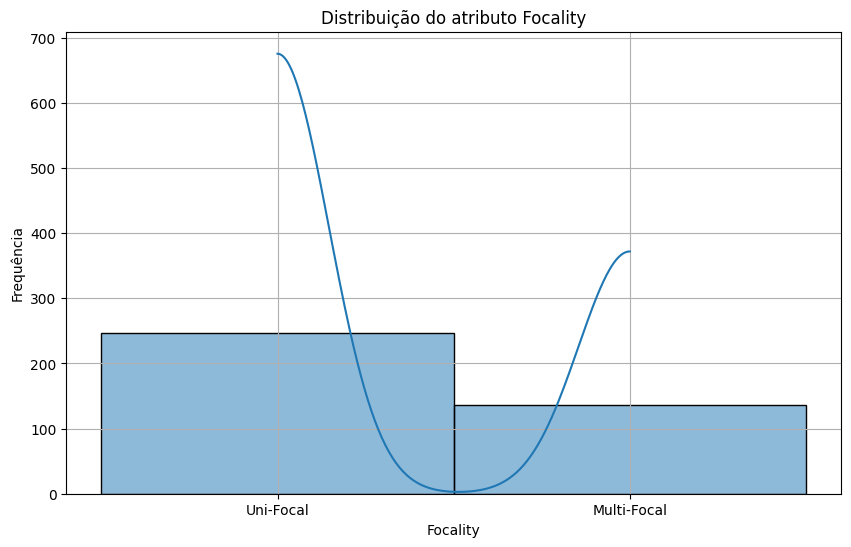

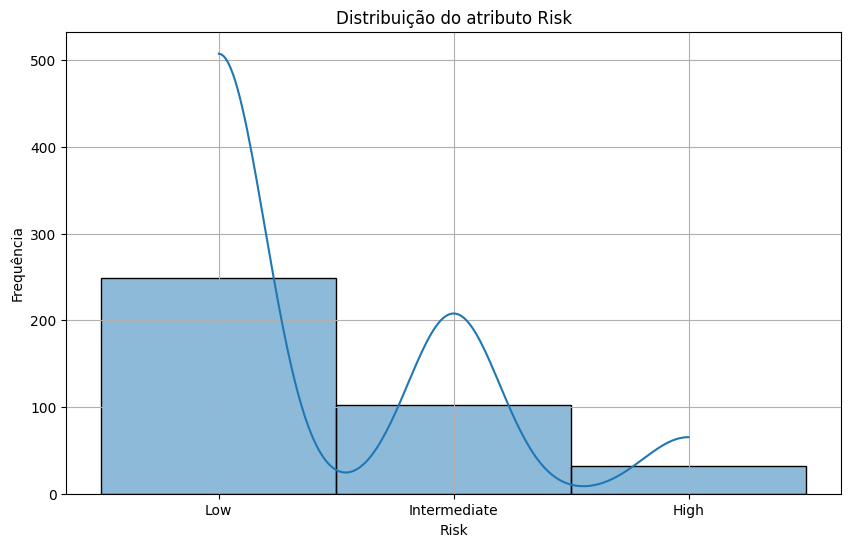

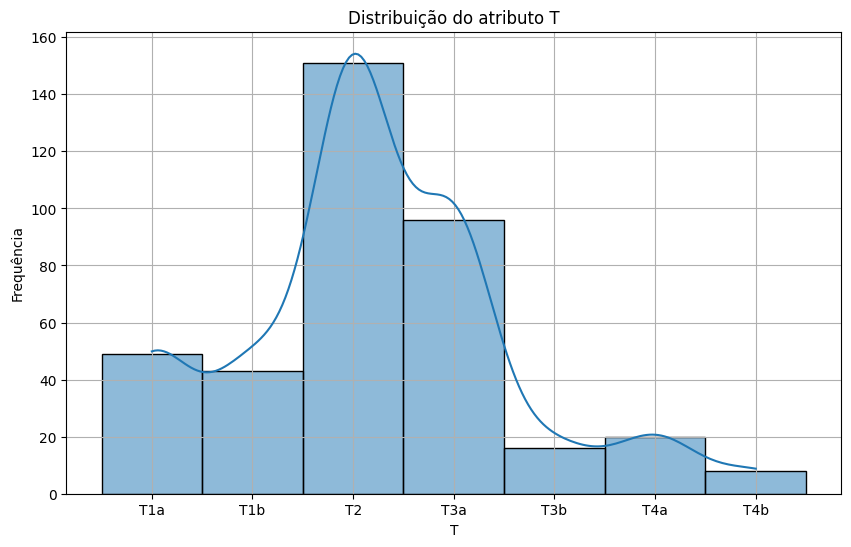

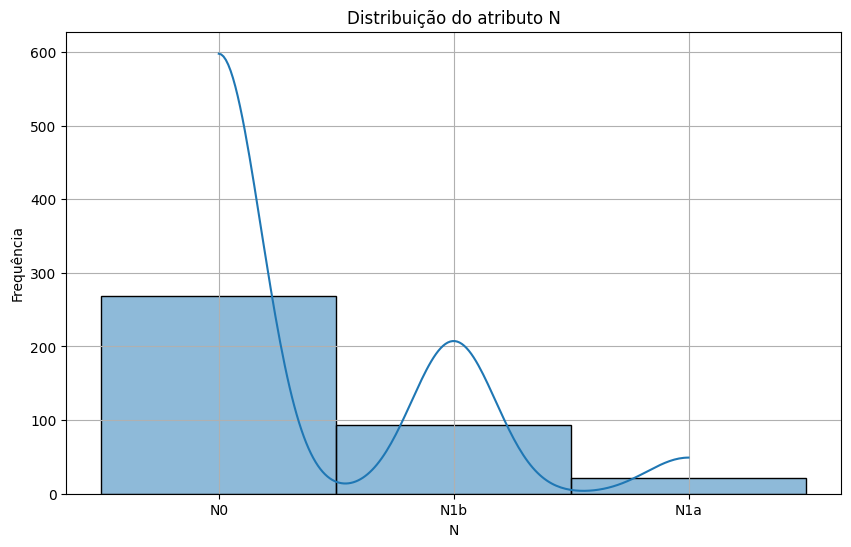

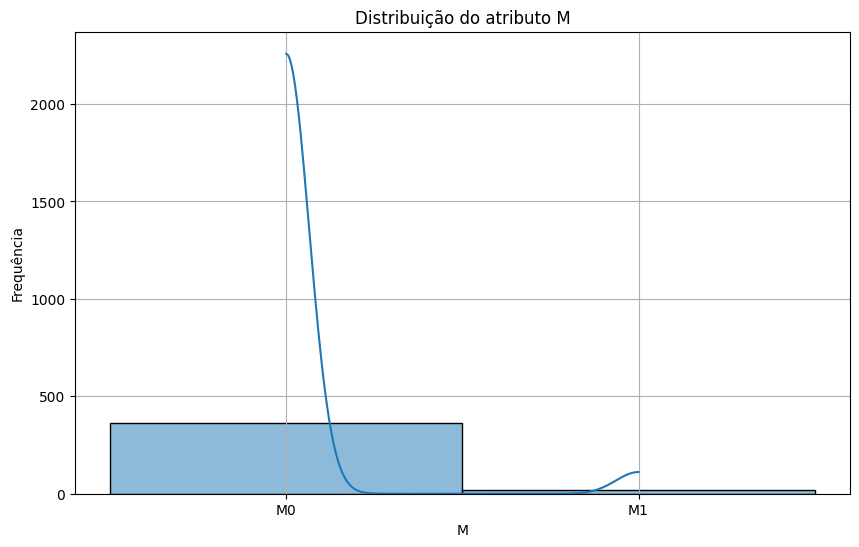

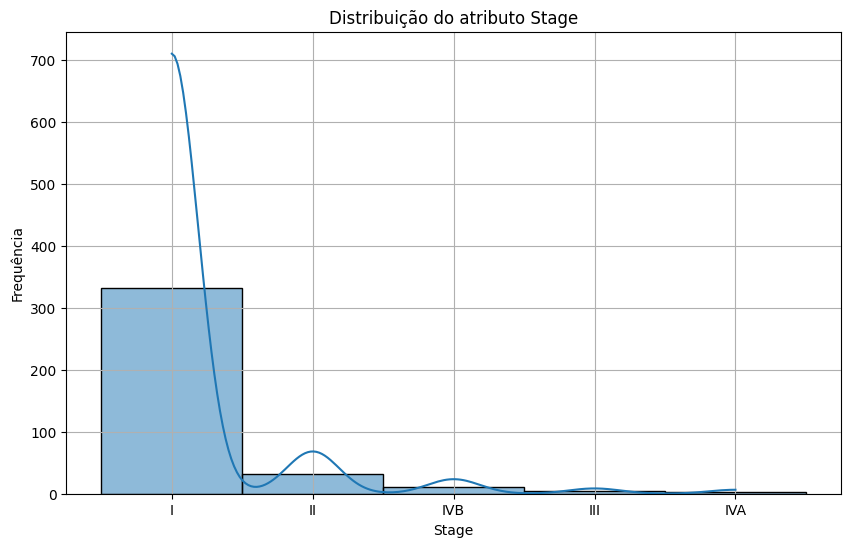

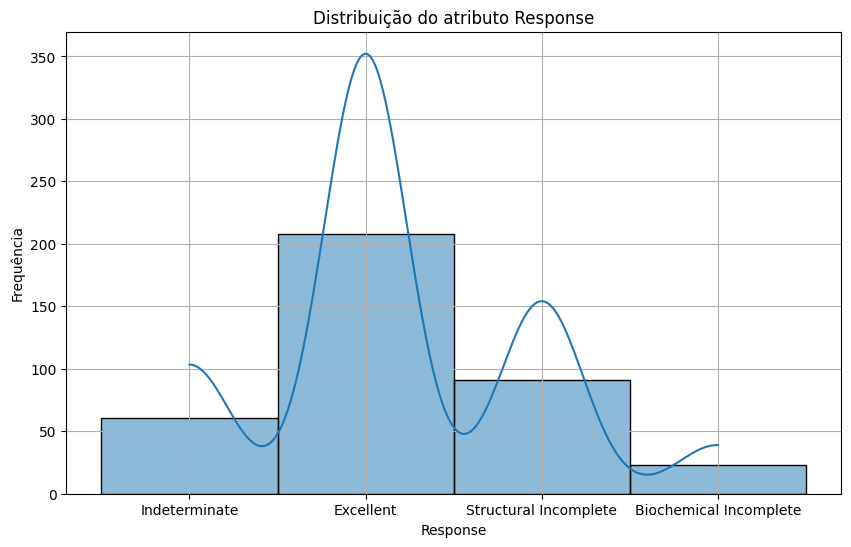

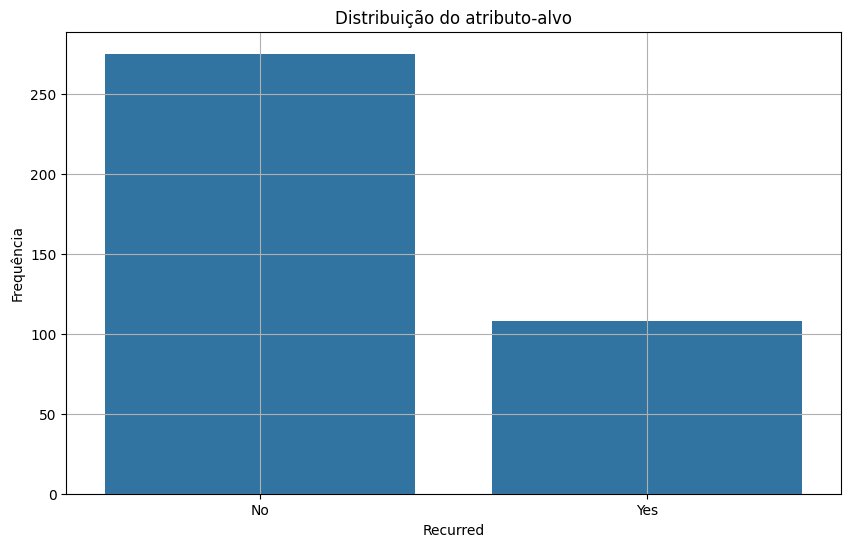


Medidas estatísticas:
              Age
count  383.000000
mean    40.866841
std     15.134494
min     15.000000
25%     29.000000
50%     37.000000
75%     51.000000
max     82.000000

Balanceamento do atributo-alvo:
Recurred
No     275
Yes    108
Name: count, dtype: int64


In [ ]:
predictors = df.columns.drop('Recurred')
for column in predictors:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuição do atributo {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# Visualizar a distribuição do atributo-alvo
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Recurred'])
plt.title('Distribuição do atributo-alvo')
plt.xlabel('Recurred')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Medidas estatísticas complementares
print("\nMedidas estatísticas:")
print(df.describe())

# Avaliação do balanceamento do atributo-alvo
target_balance = df['Recurred'].value_counts()
print("\nBalanceamento do atributo-alvo:")
print(target_balance)

2. A partir da visualização elaborada, o que pode-se dizer a respeito do balanceamento do atributo-alvo?










  

*   A partir da visualização fornecida, pode-se observar que o atributo-alvo está desequilibrado.
*   Especificamente, a distribuição das classes "No" (Não Recorrente) e "Yes" (Recorrente) não é uniforme:
*  A classe "No" (Não Recorrente) possui 275 instâncias.
*  A classe "Yes" (Recorrente) possui 108 instâncias.\
Isso significa que há uma quantidade significativamente maior de exemplos da classe "No" em comparação com a classe "Yes".

3. Que tipo de tarefa de Aprendizado de Máquina é sugestiva para este problema?  
    3.1 Apresente métricas de desempenho compatíveis para a avaliação do problema (liste-as)  
    3.2 Escolha uma das métricas apresentadas para ser utilizada como referência pela equipe

Para problemas de classificação binária, as seguintes métricas de desempenho são comumente utilizadas:



*  Acurácia
*  Precisão
*  Recall
*  F1-Score
*  Área sob a Curva ROC
*  AUC-PR
*  Matriz de Confusão















Para este problema específico de classificação binária desbalanceada, a métrica escolhida é:



*   F1-Score



